### Unzip the Dataset and Load Dataset
- Preprocessing
    - removing nan entries
    - select interest features
    - transform some categorical data to quantity data for later purpose

In [ ]:
!unzip vehicles.csv.zip

In [25]:
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import TwoByTwoLayout
from ipywidgets import Button, Layout, jslink, IntText, IntSlider
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from scipy.stats import chi2_contingency
import matplotlib as mpl
from util import cars_in_price_range, decide_value_of_cars, path_to_image_html, preference_selection

import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('vehicles.csv')
df.dropna(inplace=True)
rec_dataset = df.copy()
rec_dataset = rec_dataset[['condition', 'odometer', 'title_status', 'manufacturer', 'model', 'price', 'year', 'image_url']]
# drop empty entry
rec_dataset.dropna(inplace=True)

#### Transform rules
Condition: new-100, excellent-95, like new-90, good-85, fair-60, salvage-5 <br>
title status: clean-100, lien-90, rebuilt-40, missing-20, parts only-10, salvage-5

In [4]:
corr_dt = df.copy()
corr_dt = corr_dt[['condition', 'title_status', 'odometer', 'manufacturer', 'model', 'price', 'year']]
corr_dt['condition'].replace(['excellent', 'fair', 'good', 'like new', 'new', 'salvage'], [95, 60, 85, 90, 100, 5], inplace=True)
corr_dt['year'] = corr_dt['year'].apply(lambda x: 2021-x)
corr_dt['title_status'].replace(['clean','lien','rebuilt','missing','parts only','salvage'], [100,90,40,20,10,5],inplace=True)

## Odometer VS Price Plot

In [ ]:
import plot
plot.odometer()

## Distributions of four factors

In [ ]:
import Distributions
Distributions.pie_count_all(df, 'year_range')
Distributions.pie_count_all(df, 'condition')
Distributions.pie_count_all(df, 'odometer_range')
Distributions.pie_count_all(df, 'title_status')



# Correlation Analysis
- correlation between categorical data
    - crosstab: count how many each tow category have in common
    - perofrm hypothesis testing through chi2
- correlation between two quantity data
    - spearman correlation: measure rank correlation

In [6]:
# categorical data
pd.crosstab(df['title_status'], df['condition'])
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df['title_status'], df['condition']))

(2725.4489363353146,
 0.0,
 25,
 array([[2.19670841e+04, 5.87127973e+02, 1.35763687e+04, 4.52127166e+03,
         2.23070003e+02, 5.40775764e+01],
        [1.18076633e+02, 3.15590789e+00, 7.29751793e+01, 2.43025670e+01,
         1.19903737e+00, 2.90675727e-01],
        [9.12410344e+00, 2.43865610e-01, 5.63899113e+00, 1.87792563e+00,
         9.26528879e-02, 2.24613062e-02],
        [1.61013590e+00, 4.30351076e-02, 9.95116082e-01, 3.31398641e-01,
         1.63505096e-02, 3.96375991e-03],
        [4.93238297e+02, 1.31830880e+01, 3.04837226e+02, 1.01518450e+02,
         5.00870612e+00, 1.21423179e+00],
        [1.58866742e+02, 4.24613062e+00, 9.81847867e+01, 3.26979992e+01,
         1.61325028e+00, 3.91090978e-01]]))

In [5]:
corr_dt = corr_dt[['odometer','year','condition','title_status','price']]
corr_dt.corr(method='spearman')

,odometer,year,condition,title_status,price
odometer,1.000000,0.584491,-0.152517,0.081863,-0.388486
year,0.584491,1.000000,-0.187168,0.043640,-0.477916
condition,-0.152517,-0.187168,1.000000,0.003948,0.052658
title_status,0.081863,0.043640,0.003948,1.000000,0.005363
price,-0.388486,-0.477916,0.052658,0.005363,1.000000


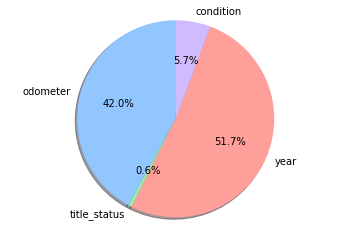

In [27]:
# how heavy each factor correlate with price
mpl.style.use('seaborn-pastel')
labels = 'odometer','title_status','year','condition'
sizes = {}
corr_res = corr_dt.corr(method='spearman')
for l in labels:
    sizes[l] = abs(corr_res['price'][l])/(sum(abs(corr_res['price']))-corr_res['price']['price'])

fig1, ax1 = plt.subplots()
ax1.pie(sizes.values(), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Used Car Recommendation System

### Please Enter the range of price:

In [ ]:
lower_bound = widgets.FloatText(
    value=0,
    description='From:',
    disabled=False
)
display(lower_bound)

In [ ]:
upper_bound = widgets.FloatText(
    value=0,
    description='To:',
    disabled=False
)
display(upper_bound)

### Filters

In [ ]:
state = [ 'None', 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NC', 'NE', 'NV', 'NJ', 'NM', 'NY',
       'NH', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
state_selector = widgets.Dropdown(
    options=state,
    value='None',
    description='STATE:',
    disabled=False,
)
display(state_selector)

In [ ]:
fuel = ['None', 'Gas', 'Diesel', 'Hybrid', 'Electric', 'Other']
fuel_selector = widgets.Dropdown(
    options=fuel,
    value='None',
    description='FUEL:',
    disabled=False,
)
display(fuel_selector)

In [ ]:
type_list = ['None','Sedan', 'SUV', 'Pickup', 'Coupe', 'Van', 'Truck',
       'Mini-van', 'Wagon', 'Convertible', 'Hatchback', 'Bus', 'Offroad', 'Other']
type_selector = widgets.Dropdown(
    options=type_list,
    value='None',
    description='Type:',
    disabled=False,
)
display(type_selector)

In [ ]:
color = ['None','Blue', 'Red', 'Silver', 'Black', 'White', 'Grey', 'Orange',
       'Green', 'Yellow', 'Custom', 'Brown', 'Purple']
color_selector = widgets.Dropdown(
    options=color,
    value='None',
    description='COLOR:',
    disabled=False,
)
display(color_selector)

In [ ]:
cylinders = ['None', 8, 4, 6, 10, 5, 3, 12]
cylinders_selector = widgets.Dropdown(
    options=cylinders,
    value='None',
    description='Cylinders:',
    disabled=False,
)
display(cylinders_selector)

In [ ]:
transmission = ['None','Automatic', 'Manual', 'Other']
transmission_selector = widgets.Dropdown(
    options=transmission,
    value='None',
    description='Transmission:',
    disabled=False,
)
display(transmission_selector)

In [ ]:
year_selector = widgets.IntRangeSlider(
    value=[2010, 2015],
    min=1900,
    max=2021,
    step=1,
    description='Year:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
display(year_selector)

In [ ]:
update_df = preference_selection(df, State=state_selector.value, Fuel=fuel_selector.value, Type=type_selector.value, color=color_selector.value, Cylinder=cylinders_selector.value, Transmission=transmission_selector.value, year_min=year_selector.value[0], year_max=year_selector.value[1])

In [ ]:
update_df = cars_in_price_range(update_df, lower_bound.value, upper_bound.value, num_of_sel=15)

In [ ]:
HTML(update_df.to_html(escape=False,formatters=dict(image_url=path_to_image_html)))

# References
- Plot Coloring: https://plotly.com/python/discrete-color/
- Correlation: https://realpython.com/numpy-scipy-pandas-correlation-python/
